## Imports

In [62]:
import os
import json
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Global Variables (API Key, URL and parameters)

In [2]:
API_KEY = 'key'
BASE_URL = f"http://api.weatherapi.com/v1/history.json?key={API_KEY}&q=Barcelos, Braga&dt=2025-01-01&end_dt=2025-01-26"

The parameters dictionary is not really used since the parameters are already in the URL.

In [28]:
params = {
            'key': API_KEY,
            'q': 'Barcelos, Braga', # City
            'dt': '2025-01-01', # Start date
            'end_dt': '2025-01-26' # End date
}

## Gather the data from the API

In [3]:
response = requests.get(BASE_URL)

Check if the request was successfull (200).

In [4]:
if response.status_code == 200:
    print('Request Successfull!')
else:
    print('Request Not Completed!')

Request Successfull!


## Save the data inside a JSON file

In [12]:
with open(os.path.join(os.getcwd(),'Weather_data.json'), 'w') as f:
    json.dump(response.json(), f, indent=4)

## Open the JSON file

In [3]:
with open(os.path.join(os.getcwd(),'Weather_data.json')) as f:
    data = json.load(f)

## Get the description from the file

In [3]:
for desc in data['location'].keys():
    print(f"{desc.capitalize()} -> {data['location'][desc]}")

Name -> Barcelos
Region -> Braga
Country -> Portugal
Lat -> 41.5333
Lon -> -8.6167
Tz_id -> Europe/Lisbon
Localtime_epoch -> 1738113420
Localtime -> 2025-01-29 01:17


## Get the data in a pandas dataframe format

In [28]:
len(data['forecast']['forecastday']) 

26

From the 1st to the 26th of January there are 26 days, so the we have all the days in the JSON file.

In [31]:
data['forecast']['forecastday'][0].keys()

dict_keys(['date', 'date_epoch', 'day', 'astro', 'hour'])

For each day, we have annotations per hour. We can use these annotations as columns.

We'll mostly use the information inside the 'hour' key.

There is information about each day, such as maximum temperature and astrology.

In [4]:
forecast_day = data['forecast']['forecastday']

Check data for 2 days (maximum values and astrology).

In [6]:
for day in range(2):#range(len(forecast_day)):
    print(f"\n For {forecast_day[day]['date']}: ")
    print(f"Maximum temperature(ºC): {forecast_day[day]['day']['maxtemp_c']}\
        \nMinimum temperature(ºC): {forecast_day[day]['day']['mintemp_c']}\
        \nAverage temperature(ºC): {forecast_day[day]['day']['avgtemp_c']}\
        \nMaximum wind(kph): {forecast_day[day]['day']['maxwind_kph']}\
        \nPrecipitation(mm): {forecast_day[day]['day']['totalprecip_mm']}\
        \nSnow(cm): {forecast_day[day]['day']['totalsnow_cm']}\
        \nAverage Visibility(km): {forecast_day[day]['day']['avgvis_km']}\
        \nAverage Humidity(%): {forecast_day[day]['day']['avghumidity']}\
        \nSunrise: {forecast_day[day]['astro']['sunrise']}\
        Sunset: {forecast_day[day]['astro']['sunset']}\
        Moonrise: {forecast_day[day]['astro']['moonrise']}\
        Moonset: {forecast_day[day]['astro']['moonset']}\
        Moon Phase: {forecast_day[day]['astro']['moon_phase']}\
        Moon Illumination: {forecast_day[day]['astro']['moon_illumination']}") #Ver a documentação


 For 2025-01-01: 
Maximum temperature(ºC): 12.6        
Minimum temperature(ºC): 4.4        
Average temperature(ºC): 8.0        
Maximum wind(kph): 9.4        
Precipitation(mm): 0.0        
Snow(cm): 0.0        
Average Visibility(km): 10.0        
Average Humidity(%): 67        
Sunrise: 08:01 AM        Sunset: 05:16 PM        Moonrise: 09:36 AM        Moonset: 06:49 PM        Moon Phase: Waxing Crescent        Moon Illumination: 1

 For 2025-01-02: 
Maximum temperature(ºC): 12.8        
Minimum temperature(ºC): 5.9        
Average temperature(ºC): 9.0        
Maximum wind(kph): 12.6        
Precipitation(mm): 0.0        
Snow(cm): 0.0        
Average Visibility(km): 10.0        
Average Humidity(%): 72        
Sunrise: 08:01 AM        Sunset: 05:16 PM        Moonrise: 10:10 AM        Moonset: 08:04 PM        Moon Phase: Waxing Crescent        Moon Illumination: 5


In [8]:
forecast_day[0]['hour'][0]

{'time_epoch': 1735689600,
 'time': '2025-01-01 00:00',
 'temp_c': 5.6,
 'temp_f': 42.0,
 'is_day': 0,
 'condition': {'text': 'Clear',
  'icon': '//cdn.weatherapi.com/weather/64x64/night/113.png',
  'code': 1000},
 'wind_mph': 5.1,
 'wind_kph': 8.3,
 'wind_degree': 79,
 'wind_dir': 'E',
 'pressure_mb': 1030.0,
 'pressure_in': 30.43,
 'precip_mm': 0.0,
 'precip_in': 0.0,
 'snow_cm': 0.0,
 'humidity': 75,
 'cloud': 0,
 'feelslike_c': 3.7,
 'feelslike_f': 38.7,
 'windchill_c': 3.7,
 'windchill_f': 38.7,
 'heatindex_c': 5.6,
 'heatindex_f': 42.0,
 'dewpoint_c': 1.5,
 'dewpoint_f': 34.6,
 'will_it_rain': 0,
 'chance_of_rain': 0,
 'will_it_snow': 0,
 'chance_of_snow': 0,
 'vis_km': 10.0,
 'vis_miles': 6.0,
 'gust_mph': 10.8,
 'gust_kph': 17.4,
 'uv': 0.0}

In [21]:
# Empty dictionary with all the features as keys:
features = {feat: [] for feat in forecast_day[0]['hour'][0]}

In [16]:
features

{'time_epoch': [],
 'time': [],
 'temp_c': [],
 'temp_f': [],
 'is_day': [],
 'condition': [],
 'wind_mph': [],
 'wind_kph': [],
 'wind_degree': [],
 'wind_dir': [],
 'pressure_mb': [],
 'pressure_in': [],
 'precip_mm': [],
 'precip_in': [],
 'snow_cm': [],
 'humidity': [],
 'cloud': [],
 'feelslike_c': [],
 'feelslike_f': [],
 'windchill_c': [],
 'windchill_f': [],
 'heatindex_c': [],
 'heatindex_f': [],
 'dewpoint_c': [],
 'dewpoint_f': [],
 'will_it_rain': [],
 'chance_of_rain': [],
 'will_it_snow': [],
 'chance_of_snow': [],
 'vis_km': [],
 'vis_miles': [],
 'gust_mph': [],
 'gust_kph': [],
 'uv': []}

In [22]:
for day in range(len(forecast_day)):
    hour = forecast_day[day]['hour']
    for tstep in range(len(hour)):
        for feature in hour[tstep]:
            features[feature].append(hour[tstep][feature])

## Convert it into a Pandas Dataframe

In [32]:
df = pd.DataFrame.from_dict(data=features)

In [33]:
df.head(5)

,time_epoch,time,temp_c,temp_f,is_day,condition,wind_mph,wind_kph,wind_degree,wind_dir,...,dewpoint_f,will_it_rain,chance_of_rain,will_it_snow,chance_of_snow,vis_km,vis_miles,gust_mph,gust_kph,uv
0,1735689600,2025-01-01 00:00,5.6,42.0,0,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",5.1,8.3,79,E,...,34.6,0,0,0,0,10.0,6.0,10.8,17.4,0.0
1,1735693200,2025-01-01 01:00,5.3,41.6,0,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",5.8,9.4,91,E,...,34.0,0,0,0,0,10.0,6.0,12.2,19.7,0.0
2,1735696800,2025-01-01 02:00,5.1,41.2,0,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",5.4,8.6,90,E,...,33.3,0,0,0,0,10.0,6.0,11.3,18.1,0.0
3,1735700400,2025-01-01 03:00,5.0,40.9,0,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",5.4,8.6,89,E,...,32.7,0,0,0,0,10.0,6.0,11.3,18.1,0.0
4,1735704000,2025-01-01 04:00,4.8,40.7,0,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",5.6,9.0,93,E,...,32.3,0,0,0,0,10.0,6.0,11.7,18.9,0.0


In [34]:
df.columns

Index(['time_epoch', 'time', 'temp_c', 'temp_f', 'is_day', 'condition',
       'wind_mph', 'wind_kph', 'wind_degree', 'wind_dir', 'pressure_mb',
       'pressure_in', 'precip_mm', 'precip_in', 'snow_cm', 'humidity', 'cloud',
       'feelslike_c', 'feelslike_f', 'windchill_c', 'windchill_f',
       'heatindex_c', 'heatindex_f', 'dewpoint_c', 'dewpoint_f',
       'will_it_rain', 'chance_of_rain', 'will_it_snow', 'chance_of_snow',
       'vis_km', 'vis_miles', 'gust_mph', 'gust_kph', 'uv'],
      dtype='object')

## Perform Data Preprocessing (Feature Selection and Data Conversion)

Some features are redundant (We don't need temperature in both Celsius and Fahrenheit).

Also, time_epoch is not needed (It is similar to an index for this purpose).

In [38]:
df.drop(columns=['time_epoch', 'temp_f', 'wind_mph', 'pressure_in', 'precip_in', 'feelslike_f', 'windchill_f' ,'heatindex_f', 'dewpoint_f', 'vis_miles', 'gust_mph'], inplace=True)

In Barcelos it never snows, so the snow_cm, will_it_snow, chance_of_snow columns don't give us any additional information.

In [48]:
df.drop(columns=['snow_cm', 'will_it_snow', 'chance_of_snow'], inplace=True)

We need to convert the time column to the datetime format. This way we can extract the hour and day from the variable.

In [52]:
df['time'] = pd.to_datetime(df['time'])

In [56]:
df[['hour_of_day', 'day']] = df['time'].apply(lambda tstamp: pd.Series([tstamp.hour, tstamp.day]))

Now we can drop the time column.

In [58]:
df.drop(columns='time', inplace=True)

The column condition has multiple values inside it. We can parse it and get only what we want (text with the condition).

In [68]:
df['condition'] = df['condition'].apply(lambda condition: condition['text'])

In [69]:
df['condition'].value_counts()

condition
Light rain shower                      141
Clear                                  106
Patchy rain possible                    97
Sunny                                   74
Overcast                                61
Partly cloudy                           40
Cloudy                                  22
Mist                                    21
Light drizzle                           18
Light rain                              14
Moderate rain                           14
Fog                                      5
Heavy rain                               4
Moderate or heavy rain shower            3
Moderate or heavy rain with thunder      3
Patchy light rain with thunder           1
Name: count, dtype: int64

We can group some of these conditions together to reduce redundancy and focus on the more important conditions (If it is raining or not).

We can then use this column as the target column and perform classification.

We will only focus on raining since that is the most important weather condition for this city, considering the recent storms.

We are going to do two tests: Grouped conditions; Normal

In [70]:
# [Light rain shower, Patchy rain possible, Light drizzle, Light rain, Patchy light rain with thunder] -> Light Rain
# [Moderate rain, Heavy rain, Moderate or heavy rain shower, Moderate of heavy rain with thunder] -> Moderate/Heavy Rain
# [Clear, Sunny, Overcast, Partly cloudy, Cloudy, Mist, Fog]-> No Rain

We can find features that are highly correlated and see if they're worth keeping on the dataframe.

<Axes: >

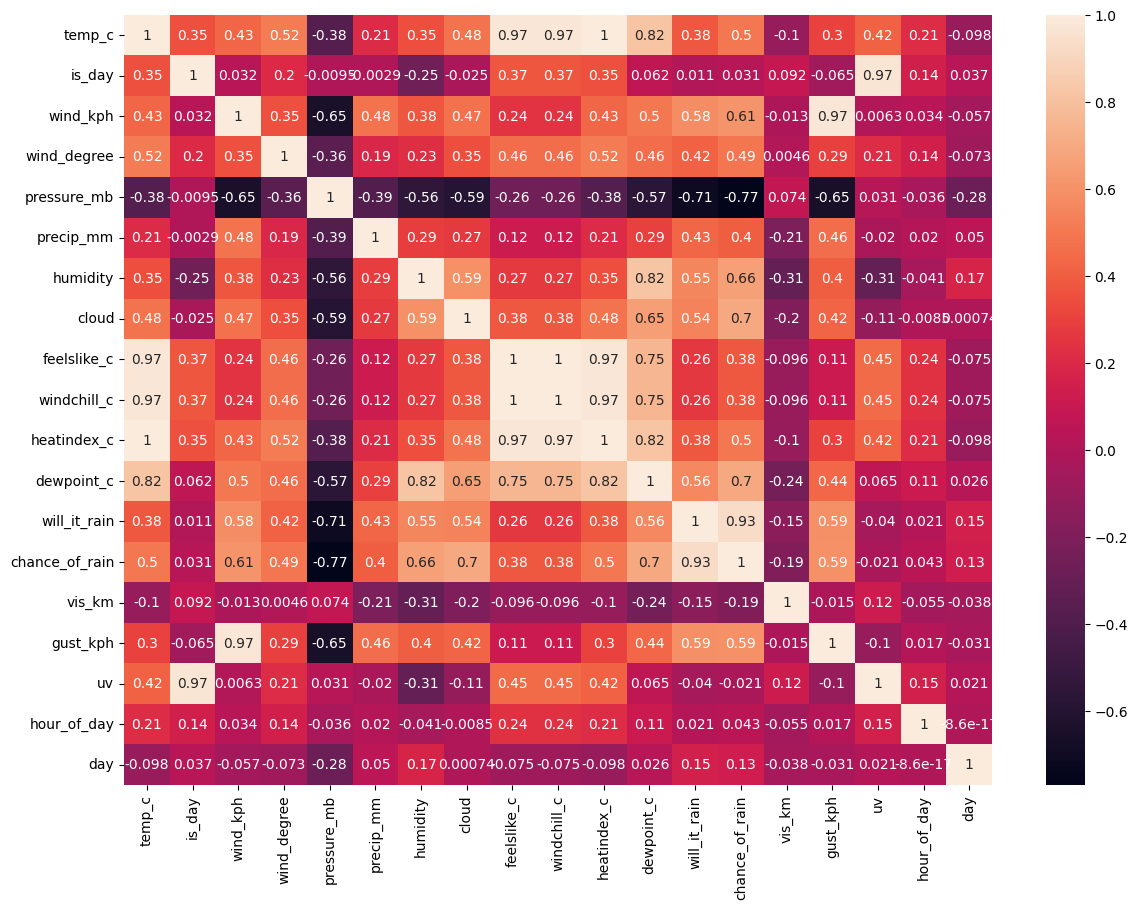

In [64]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(numeric_only=True), annot=True)

There are some features with really high correlation. This can induce multicollinearity. For this reason, we will reduce the number of features, specially the ones with correlations above 0.9 with another feature.

wind_kph and gust_kph have similar meaning, and their correlation values are similar. feelslile_c and windchill_c share the same correlation values. heatindex_c and temp_c share the same correlation values. is_day and uv have similar correlation values, so we are going to remove is_day (uv gives us an insight on the intensity of the sun).

dewpoint_c has high correlation with temp_c, but it is going to be maintained, due to its importance in determining if it will rain.

Dew point temperature is the temperature at which air becomes saturated with water vapor.

In [ ]:
df.drop(columns=['gust_kph', 'feelslike_c', 'heatindex_c', 'is_day'], inplace=True)

<Axes: >

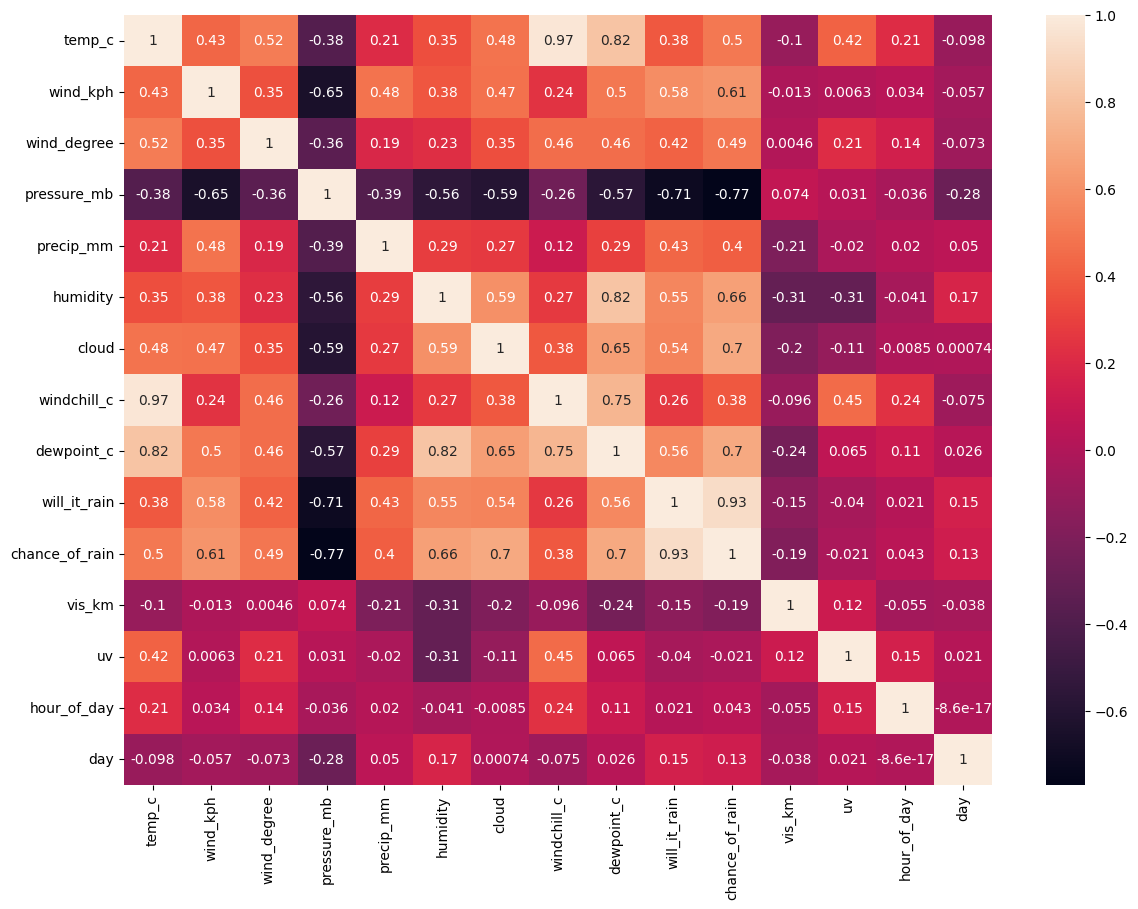

In [75]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temp_c          624 non-null    float64
 1   condition       624 non-null    object 
 2   wind_kph        624 non-null    float64
 3   wind_degree     624 non-null    int64  
 4   wind_dir        624 non-null    object 
 5   pressure_mb     624 non-null    float64
 6   precip_mm       624 non-null    float64
 7   humidity        624 non-null    int64  
 8   cloud           624 non-null    int64  
 9   windchill_c     624 non-null    float64
 10  dewpoint_c      624 non-null    float64
 11  will_it_rain    624 non-null    int64  
 12  chance_of_rain  624 non-null    int64  
 13  vis_km          624 non-null    float64
 14  uv              624 non-null    float64
 15  hour_of_day     624 non-null    int64  
 16  day             624 non-null    int64  
dtypes: float64(8), int64(7), object(2)


In [83]:
df['chance_of_rain'].value_counts()

chance_of_rain
0      265
100    235
45     124
Name: count, dtype: int64

In [81]:
df['will_it_rain'].value_counts()

will_it_rain
0    389
1    235
Name: count, dtype: int64

In [77]:
# No ordinal relationship -> no Ordinal Encoder
# I will not use pd.get_dummies() (Curse of dimensionality) -> no One Hot Encoder
# Label Encoding looks like the only method usable
df['wind_dir'].value_counts()

wind_dir
S      83
SSE    79
E      78
ENE    71
ESE    61
SSW    55
SE     48
SW     40
WNW    23
WSW    18
NW     16
W      15
NE     12
NNW    11
NNE    10
N       4
Name: count, dtype: int64

In [86]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()
df['wind_dir'] = lbe.fit_transform(df['wind_dir'])

In [92]:
df['wind_dir'].value_counts()

wind_dir
8     83
10    79
0     78
1     71
2     61
11    55
9     48
12    40
14    23
15    18
7     16
13    15
4     12
6     11
5     10
3      4
Name: count, dtype: int64

In [101]:
# We can also do one-hot encoding for the chance_of_rain
chance_of_rain_cols = pd.get_dummies(df['chance_of_rain'], drop_first=True, dtype='int')
df = pd.concat([df.drop('chance_of_rain', axis=1), chance_of_rain_cols], axis=1)

In [106]:
# Change the name of the created columns
df.rename(columns={45: '45_chance_rain', 100: '100_chance_rain'}, inplace=True)

## Split the data for Machine Learning (Multi-class classification task)

The reason I only use machine learning models is because it has been proven in the article "Tabular Data: Deep Learning is Not All You Need".

Overall, deep learning models are better suited for NLP and Image classification/segmentation/detection tasks.

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X = df.drop(columns='condition')
y = df['condition']

The dataset is really smal, so I'm going to do a 80-20 split.

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [110]:
from sklearn.preprocessing import MinMaxScaler

In [111]:
scaler = MinMaxScaler()

In [112]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Now it's time to perform multi-class classification.

In [119]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
ada = AdaBoostClassifier()
gaussian = GaussianNB()

In [123]:
rfc.fit(X_train, y_train)
gbc.fit(X_train, y_train)
ada.fit(X_train, y_train)
gaussian.fit(X_train, y_train)

GaussianNB()

In [132]:
from sklearn.metrics import classification_report, confusion_matrix

In [133]:
rfc_pred = rfc.predict(X_test)
gbc_pred = gbc.predict(X_test)
ada_pred = ada.predict(X_test)
gaussian_pred = gaussian.predict(X_test)

# Random Forest

In [134]:
print(confusion_matrix(y_test, rfc_pred))
print('\n')
print(classification_report(y_test, rfc_pred))

[[24  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  4  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  5  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  3  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 12  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  7  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 13  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 13]]


                                     precision    recall  f1-score   support

                              Clear       1.00      1.00      1.00        24
                             Cloudy       1.00      0.75      0.86         4
                                Fog       1.0

c:\Users\Utilizador\anaconda3\envs\dl_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Utilizador\anaconda3\envs\dl_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Utilizador\anaconda3\envs\dl_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result

# Gradient Boosting

In [135]:
print(confusion_matrix(y_test, gbc_pred))
print('\n')
print(classification_report(y_test, gbc_pred))

[[24  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  3  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  5  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  2  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0 13  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  7  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 13  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 13]]


                                precision    recall  f1-score   support

                         Clear       1.00      1.00      1.00        24
                        Cloudy       1.00      1.00      1.00         4
                           Fog       1.00      1.00      1.0

c:\Users\Utilizador\anaconda3\envs\dl_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Utilizador\anaconda3\envs\dl_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Utilizador\anaconda3\envs\dl_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result

# ADABoost

In [136]:
print(confusion_matrix(y_test, ada_pred))
print('\n')
print(classification_report(y_test, ada_pred))

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0 24]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  4  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  5  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 31  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  5  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  2  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 13  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  7  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 13  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 13]]


                               precision    recall  f1-score   support

                        Clear       0.00      0.00      0.00        24
                       Cloudy       0.00      0.00      0.00         4
                          Fog       0.00      0.00      0.00         2
                   Heavy rain       0.00      0.00      0.00         1
           

c:\Users\Utilizador\anaconda3\envs\dl_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Utilizador\anaconda3\envs\dl_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Utilizador\anaconda3\envs\dl_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

# Gaussian Naive Bayes

In [137]:
print(confusion_matrix(y_test, gaussian_pred))
print('\n')
print(classification_report(y_test, gaussian_pred))

[[24  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  5  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 31  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  5  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  3  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0 11  1  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  5  0  0]
 [ 0  0  0  0  0  0  3  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 13]]


                               precision    recall  f1-score   support

                        Clear       0.92      1.00      0.96        24
                       Cloudy       0.80      1.00      0.89         4
                          Fog       1.00      1.00      1.00         2
                   Heavy rain       0.50      1.00      0.67         1
           

c:\Users\Utilizador\anaconda3\envs\dl_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Utilizador\anaconda3\envs\dl_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Utilizador\anaconda3\envs\dl_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

## Saving the dataframe as a CSV file.

In [140]:
df.to_csv(os.path.join(os.getcwd(), 'weather_df.csv'), index=False)

## Now, we are going to test if the prediction is better with grouped conditions

[Light rain shower, Patchy rain possible, Light drizzle, Light rain, Patchy light rain with thunder] -> Light Rain (1)

[Moderate rain, Heavy rain, Moderate or heavy rain shower, Moderate of heavy rain with thunder] -> Moderate/Heavy Rain (2)

[Clear, Sunny, Overcast, Partly cloudy, Cloudy, Mist, Fog]-> No Rain (0)

In [148]:
df['condition'].value_counts()

condition
Light rain shower                      141
Clear                                  106
Patchy rain possible                    97
Sunny                                   74
Overcast                                61
Partly cloudy                           40
Cloudy                                  22
Mist                                    21
Light drizzle                           18
Light rain                              14
Moderate rain                           14
Fog                                      5
Heavy rain                               4
Moderate or heavy rain shower            3
Moderate or heavy rain with thunder      3
Patchy light rain with thunder           1
Name: count, dtype: int64

In [ ]:
light_rain = ['Light rain shower', 'Patchy rain possible', 'Light drizzle', 'Light rain', 'Patchy light rain with thunder']
mod_heavy_rain = ['Moderate rain', 'Heavy rain', 'Moderate or heavy rain shower', 'Moderate or heavy rain with thunder']
no_rain = ['Clear', 'Sunny', 'Overcast', 'Partly cloudy', 'Cloudy', 'Mist', 'Fog']

df['condition'] = df['condition'].map({a: 0 for a in no_rain} | {b: 1 for b in light_rain} | {c: 2 for c in mod_heavy_rain})

## Machine Learning part

In [152]:
X = df.drop(columns='condition')
y = df['condition']

In [153]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=101)

In [154]:
X_train_2 = scaler.fit_transform(X_train_2)
X_test_2 = scaler.transform(X_test_2)

In [155]:
rfc2 = RandomForestClassifier()
gbc2 = GradientBoostingClassifier()
ada2 = AdaBoostClassifier()
gaussian2 = GaussianNB()

rfc2.fit(X_train_2, y_train_2)
gbc2.fit(X_train_2, y_train_2)
ada2.fit(X_train_2, y_train_2)
gaussian2.fit(X_train_2, y_train_2)

GaussianNB()

In [156]:
rfc2_pred = rfc2.predict(X_test_2)
gbc2_pred = gbc2.predict(X_test_2)
ada2_pred = ada2.predict(X_test_2)
gaussian2_pred = gaussian2.predict(X_test_2)

## Random Forest

In [159]:
print(confusion_matrix(y_test_2, rfc2_pred))
print('\n')
print(classification_report(y_test_2, rfc2_pred))

[[68  0  0]
 [ 0 52  0]
 [ 0  1  4]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       0.98      1.00      0.99        52
           2       1.00      0.80      0.89         5

    accuracy                           0.99       125
   macro avg       0.99      0.93      0.96       125
weighted avg       0.99      0.99      0.99       125



## Gradient Boosting

In [158]:
print(confusion_matrix(y_test_2, gbc2_pred))
print('\n')
print(classification_report(y_test_2, gbc2_pred))

[[68  0  0]
 [ 1 51  0]
 [ 0  1  4]]


              precision    recall  f1-score   support

           0       0.99      1.00      0.99        68
           1       0.98      0.98      0.98        52
           2       1.00      0.80      0.89         5

    accuracy                           0.98       125
   macro avg       0.99      0.93      0.95       125
weighted avg       0.98      0.98      0.98       125



## ADABoost

In [157]:
print(confusion_matrix(y_test_2, ada2_pred))
print('\n')
print(classification_report(y_test_2, ada2_pred))

[[68  0  0]
 [ 1 51  0]
 [ 0  1  4]]


              precision    recall  f1-score   support

           0       0.99      1.00      0.99        68
           1       0.98      0.98      0.98        52
           2       1.00      0.80      0.89         5

    accuracy                           0.98       125
   macro avg       0.99      0.93      0.95       125
weighted avg       0.98      0.98      0.98       125



## Gaussian Naive Bayes

In [160]:
print(confusion_matrix(y_test_2, gaussian2_pred))
print('\n')
print(classification_report(y_test_2, gaussian2_pred))

[[66  2  0]
 [ 6 13 33]
 [ 0  0  5]]


              precision    recall  f1-score   support

           0       0.92      0.97      0.94        68
           1       0.87      0.25      0.39        52
           2       0.13      1.00      0.23         5

    accuracy                           0.67       125
   macro avg       0.64      0.74      0.52       125
weighted avg       0.86      0.67      0.68       125

